In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


# Introduction
![](https://media.istockphoto.com/id/1400262642/tr/vekt%C3%B6r/print.jpg?s=612x612&w=0&k=20&c=5P5e9dUYMibp5TsbdA4lJ3Q7mC_bK2IWQxnu7sON8Jw=)

Hello everyone,

I will briefly tell what I have done in my project and which resources I followed. I created this project by following this [YouTube video series](https://youtube.com/playlist?list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&si=VgwePgdyLbC6I4VC) with my own comments.Based on the “Data Science Roadmap” content creator Codebasics that I have been following for a long time for becoming data scientist.

In our project, I used the “bengaluru-house-price-data” dataset, which provides information about house prices and features in a state in India.

Firstly, we loaded our dataset and removed missing data because it did not follow any specific pattern. Next, we handled outliers by replacing outliers with boundary data using the 1.5 quantile method. Finally, we performed encoding transformations for relevant features.

Moving on to the Model Building phase, we initially created our model using linear regression. We then evaluated the score obtained from linear regression using cross-validation. Afterward, we used hyperparameter tuning (GridSearchCV) to find the best model and parameters among three models (Linear Regression, Lasso, DecisionTreeRegressor).

In the Model Evaluation stage, we examined all evaluation metrics based on the Linear Regression model, as it occured the best scores.


If you are confused, you can check out the sources or contact me. Also, please keep in mind that I am still learning and my models not perfect as statisticly, so if you spot any incorrect explanations or anything, please let me know. Enjoy your journey, as well. 📊🔍🤖

---------------------------
Herkese merhaba,

Kısaca projemizde neler yaptığımızdan ve hangi kaynakları takip ettiğimden bahsedeceğim.
Bu projemi uzun zamandır takip ettiğim "Data Science Roadmap" ninin içerik üreticisi olan Codebasic'in [Youtube video serisini](https://youtube.com/playlist?list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&si=VgwePgdyLbC6I4VC) takip ederek oluşturdum ve kendi yorumlarımla birlikte sizlerle paylaşıyorum.

Projemizde Hindistandaki bir eyalete ait ev fiyatlarının ve özelliklerinin verildiği "bengaluru-house-price-data" veri setini kullandım.

Öncelikte veri setimizi load ettik ve eksik verileri bir patern içermediği için sildik. Daha sonra aykırı verileri 1.5 quantlie yöntemi ile sınır verileri ile yer değiştirdik.  Ve en son olarak alakalı özellik/özellikler için encoding dönüşümünü gerçekleştirdik.

Daha sonra Model Building aşamasına geçtik ve ilk olarak linar regresyon ile modelimizi oluşturduk. Daha sonr cross-validation ile linear regresyondan elde ettiğimiz scorun değerlendirmesini yaptık.Daha sonra heyperparameter tuning(GridSeachCv) ile en 3 model(LineerRegression,Lasso,DecisionTreeRegressor) arasından en iyi modeli ve parametreleri bulmaya çalıştık.

Model değerlendirme aşamsına geldiğimizde ise tüm değerlendirme metriklerini Lineer regresyon modeli üzerinden inceledik. Çünkü en iyi model skorunu bu model ile elde etmiştik.

Eğer kafanız karışırsa kaynaklara bakabilir veya benimle iletişime geçebilirsiniz. Ayrıca, hala öğrenme aşamasında olduğumu ve modellerimin istatistiksel olarak mükemmel olmadığını lütfen unutmayın; bu nedenle herhangi bir yanlış açıklama veya herhangi bir şey fark ederseniz lütfen bana bildimekten çekinmeyiniz. Siz de kendi yolculuğunuzun tadını çıkarın. 📊🔍🤖


* [Data Preprocessing](#chapter1)
    * [Data cleaning](#chapter1.1)
    * [Handling with Outliers](#chapter1.2)
        * [Handling With Outliers Using Interquartile Range (IQR)](#chapter1.2.1)
    * [One-Hot Encoding](#chapter1.3)
* [Model Building](#chapter2)
    * [Linear Regression](#chapter2.1)
    * [K fold Cross Validation for measuring accuracy of our Linear Regression model](#chapter2.2)
    * [Hyper parameter Tuning (GridSearchCV): Finding best model](#chapter2.3)
*  [Model Evaluating](#chapter3)
     * [Comparing these metrics:](#chapter3.1)
* [Test the model for few properties](#chapter4) 
* [Export the tested model to a pickle file](#chapter5)
* [Export location and column information to a file that will be useful later on in our prediction application](#chapter6)


In [2]:
# adding nescessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# -------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,mean_absolute_percentage_error


# -------------------------------------------
from sklearn import linear_model

# -------------------------------------------
import scipy
from scipy.stats import shapiro
from scipy import stats

# -------------------------------------------
from sklearn.preprocessing import OneHotEncoder
# -------------------------------------------
from sklearn.model_selection import train_test_split

# -------------------------------------------
from sklearn.preprocessing import StandardScaler


# -------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# -------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# -------------------------------------------
from sklearn.model_selection import GridSearchCV

# -------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
df1=pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

# Data Preprocessing <a class="anchor"  id="chapter1"></a>

In [6]:
#deleting unnecessary columns
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

### Data cleaning / Handling missing value <a class="anchor"  id="chapter1.1"></a>

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# we dont have too much na values,so I'll drop na values 
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#as you can realize, there is a pattern. First character is number of bathroom. Let's get first character from string.
df3["size"]=df3["size"].apply(lambda x: int(x.split()[0]))

In [13]:
df3["size"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Defining functions for all total_sqft is float ?

In [15]:

def is_float(x):  #it's checking is value float ?
    try:
        float(x)
    except:
        return False
    return True

def convert_to_sqft(x): #if answer is False, this function will try yo get average if cell in this format (number - number). Otherwise it will return Null
    tokens=x.split("-")
    if len(tokens)>=2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [16]:
# lookind deeper for non-float values in total_sqft
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_to_sqft)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00


In [18]:
# let's get rid of from empty space's in location
df4.location = df4.location.apply(lambda x: x.strip()) 

# so before we go further lets check categorical variables
# so we have locations,lets see how many unique value we have
df4["location"].nunique()
# as you see we have 1287 uniqe values in locations, and if we want to encoding those could be realy huge one hot encoding problem (1287 new columns)

1287

In [19]:
# so we gonna rename some location names which rarely encounter in dataset
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [20]:
#lets see how many location we have which has less than 10 values
len(location_stats[location_stats<=10])

1047

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [22]:
#we rename locations which has less than 10 values

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [23]:
df4.shape

(13200, 5)

### Handling with Outliers  <a class="anchor"  id="chapter1.2"></a>

In [24]:
df4.dtypes

location       object
size            int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [25]:
#Outlier Removal Using Business Logic

# looking inside those data
df4[(df4.total_sqft/df4["size"])<300]

,location,size,total_sqft,bath,price
9,other,6,1020.0,6.0,370.0
45,HSR Layout,8,600.0,9.0,200.0
58,Murugeshpalya,6,1407.0,4.0,150.0
68,Devarachikkanahalli,8,1350.0,7.0,85.0
70,other,3,500.0,3.0,100.0
...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0
13279,other,6,1200.0,5.0,130.0
13281,Margondanahalli,5,1375.0,5.0,125.0
13303,Vidyaranyapura,5,774.0,5.0,70.0


In [26]:
#removing those data
df5 = df4[~((df4.total_sqft/df4["size"])<300)]
df5.shape

(12456, 5)

In [27]:
df5

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,other,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


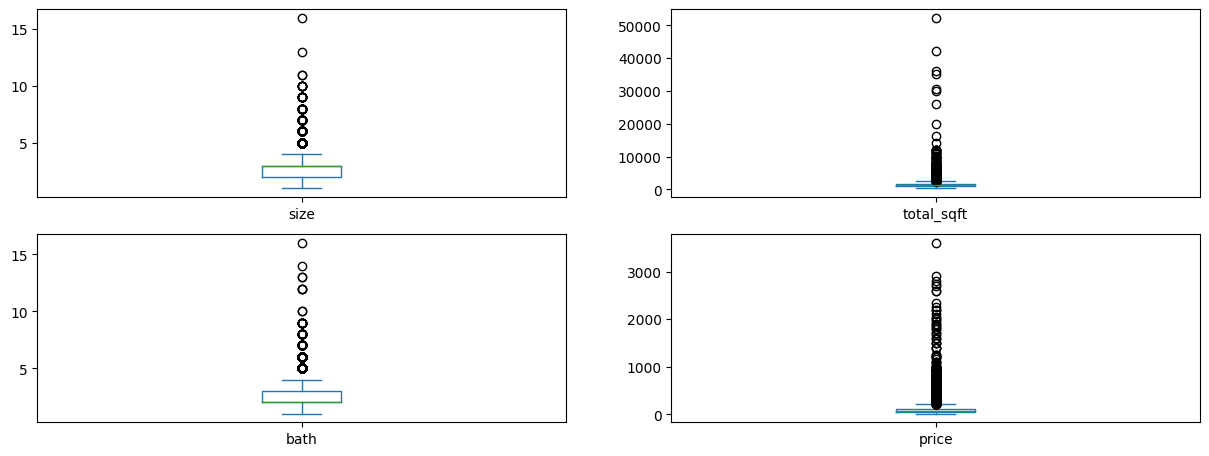

In [28]:
df5.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [29]:
# assinging numeric columns in new variable for working on IQR outlier detections
df5_num=df5.drop(["location"],axis=1)
df5

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,other,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [30]:
df5_num

,size,total_sqft,bath,price
0,2,1056.0,2.0,39.07
1,4,2600.0,5.0,120.00
2,3,1440.0,2.0,62.00
3,3,1521.0,3.0,95.00
4,2,1200.0,2.0,51.00
...,...,...,...,...
13315,5,3453.0,4.0,231.00
13316,4,3600.0,5.0,400.00
13317,2,1141.0,2.0,60.00
13318,4,4689.0,4.0,488.00


### Handling With Outliers Using Interquartile Range (IQR) <a class="anchor"  id="chapter1.2.1"></a>

In [31]:
# Defining Functions for Outliers

mean = df5_num.mean()
std = df5_num.std()


def outlier_detect(df, col):
    mean_col = mean[col]
    std_col = std[col]
    return df[((df[col] < (mean_col - 3 * std_col)) |(df[col] > (mean_col + 3 * std_col)))]
                
# -------------------------------------------

def replace_upper(df, col):
    mean_col = mean[col]
    std_col = std[col]
    tmp = 9999999
    upper = mean_col + 3 * std_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlire replace with upper bound - {}' .format(col)) 
    
# -------------------------------------------
def replace_lower(df, col):
    mean_col = mean[col]
    std_col = std[col]
    tmp = 1111111
    lower = mean_col - 3 * std_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlire replace with lower bound - {}' .format(col)) 

In [32]:
#we needs to exclude ocean proximity because it's a categorical data

num_column_names=df5_num.columns

In [33]:
# getting Outlier numbers for each column using outlier_detect function
for i in range(len(num_column_names)):
    print("Outlier numbers => {}: {}".format(num_column_names[i],(outlier_detect(df5[num_column_names],num_column_names[i]).shape[0])))

Outlier numbers => size: 183
Outlier numbers => total_sqft: 115
Outlier numbers => bath: 271
Outlier numbers => price: 184


In [34]:
# Replacing outliers with lower and upper bounds
for i in range(len(num_column_names)):
    replace_upper(df5, num_column_names[i]) 
    
print("\n*******************************************\n")
for i in range(len(num_column_names)):
    replace_lower(df5, num_column_names[i])

outlire replace with upper bound - size
outlire replace with upper bound - total_sqft
outlire replace with upper bound - bath
outlire replace with upper bound - price

*******************************************

outlire replace with lower bound - size
outlire replace with lower bound - total_sqft
outlire replace with lower bound - bath
outlire replace with lower bound - price


In [35]:
# checking if we stell have outliers in dataset
for i in range(len(num_column_names)):
    print("Outlier numbers => {}: {}".format(num_column_names[i],(outlier_detect(df5[num_column_names],num_column_names[i]).shape[0])))

Outlier numbers => size: 0
Outlier numbers => total_sqft: 0
Outlier numbers => bath: 0
Outlier numbers => price: 0


### One-Hot Encoding <a class="anchor"  id="chapter1.3"></a>

In [36]:
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df5[["location"]])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["location"]))

#before ı put those 2 resetindex code rows, was getting more rows than basis dataframe
df5.reset_index(drop=True, inplace=True)
one_hot_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df5, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop("location", axis=1)

df_encoded

,size,total_sqft,bath,price,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2.0,1056.0,2.0,39.07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,2600.0,5.0,120.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1440.0,2.0,62.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1521.0,3.0,95.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1200.0,2.0,51.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12451,5.0,3453.0,4.0,231.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12452,4.0,3600.0,5.0,400.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12453,2.0,1141.0,2.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12454,4.0,4689.0,4.0,488.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building <a class="anchor"  id="chapter2"></a>

In [37]:
X = df_encoded.drop(['price'],axis='columns')
y = df_encoded.price

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Regression <a class="anchor"  id="chapter2.1"></a>

In [39]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7028885562428866

### K fold Cross Validation for measuring accuracy of our Linear Regression model  <a class="anchor"  id="chapter2.2"></a>

In [40]:
#shuffle split for rondomly splitting data in 5 fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68677522, 0.64238414, 0.69894664, 0.72602535, 0.68518496])

*We can see that in 5 iterations we get a score around 70% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

### Hyper parameter Tuning (GridSearchCV): Finding best model <a class="anchor"  id="chapter2.3"></a>

* How to choose the best model
* And how to choose the best model parameters ? 

gridsearchCv gonna help us for finding these questions answers

In [41]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.687863,{}
1,lasso,0.627541,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.598385,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Model Evaluations<a class="anchor"  id="chapter3"></a>

We'll use linear regression model for rest of notebook.

In [42]:
y_predict=lr_clf.predict(X_test)

In [43]:
# For Linear Regression
reg_score = r2_score(y_test , y_predict)
print('R squared of linear regression :',reg_score)

p = len(X_train.iloc[:,0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
print('Adjacent R squared of linear regression : ',adj_R2)

mape = mean_absolute_percentage_error(y_test , y_predict)
print("Mean  absolute precentage error of linear regression (MAPE) : ",mape*100,'%')

reg_mae = mean_absolute_error(y_test , y_predict)
print("Mean  absolute error of linear regression (MAE): ",reg_mae)

mse = mean_squared_error(y_test , y_predict)
print("Mean  Squared error of linear regression (MSE): ",mse)

rmse = np.sqrt((mean_squared_error(y_test , y_predict)))
print("Mean  Squared error of linear regression (RMSE): ",rmse)

R squared of linear regression : 0.7028885562428866
Adjacent R squared of linear regression :  2961.1213141521207
Mean  absolute precentage error of linear regression (MAPE) :  35.2722866920421 %
Mean  absolute error of linear regression (MAE):  33.38916489482435
Mean  Squared error of linear regression (MSE):  3329.59199218915
Mean  Squared error of linear regression (RMSE):  57.70261685737615


### Comparing these metrics: <a class="anchor"  id="chapter3.1"></a>

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [44]:
X.columns

Index(['size', 'total_sqft', 'bath', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=244)

In [45]:
X.columns.get_loc('location_Indira Nagar')

116

## Test the model for few properties <a class="anchor"  id="chapter4"></a>

In [46]:
X.columns

Index(['size', 'total_sqft', 'bath', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=244)

In [47]:
def predict_price(location,sqft,bath,bhk):    
    loc_index =X.columns.get_loc("location_"+str(location)) #it find location columns order

    x = np.zeros(len(X.columns)) # we start all proporties with 0 value
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0: # it assign 1 where is location 
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [48]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

84.8150520324707

## Export the tested model to a pickle file <a class="anchor"  id="chapter5"></a>

In [49]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application <a class="anchor"  id="chapter6"></a>

In [50]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))